In [1]:
# import packages
import csv
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# set backend
%matplotlib nbagg

In [2]:
# create empty lists for data 
pop_den = []
rats = []

In [3]:
# read in average population density and append to empty list
with open("parishes.txt", newline='') as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    for row in reader:
        rowlist = []
        for value in row:
            rowlist.append(value)
        pop_den.append(rowlist)

# read in average rats caught per week and append to empty list
with open("rats.txt", newline='') as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    for row in reader:
        rowlist = []
        for value in row:
            rowlist.append(value)
        rats.append(rowlist)

<IPython.core.display.Javascript object>


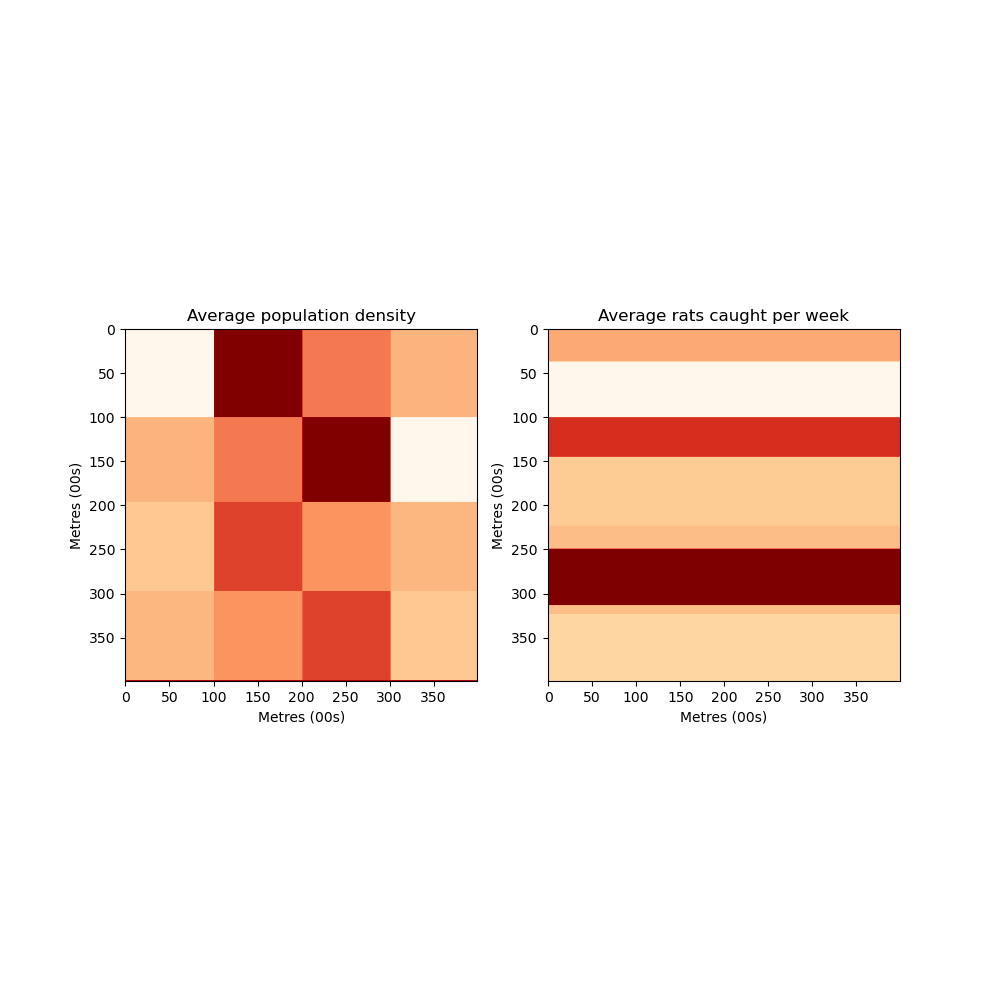

In [4]:
# create population density figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
plt.sca(ax[0]);

# set axes labels 
plt.ylabel("Metres (00s)")
plt.xlabel("Metres (00s)")

# pass through average population density list; set colour and title
plt.imshow(pop_den, cmap='OrRd'); plt.title("Average population density")

# create average rats caught per week figure
plt.sca(ax[1]);

# set axes labels
plt.ylabel("Metres (00s)")
plt.xlabel("Metres (00s)")

# pass through average rats caught per week list; set colour and title
plt.imshow(rats, cmap='OrRd'); plt.title("Average rats caught per week")

# show figures
plt.show()

In [5]:
# create empty list for calculated average deaths per week 

deaths_week = []

# formula to calculate average deaths per week per 100m x 100m square = 
# (0.8 x rats caught per week per 100m x 100m square) x (1.3 x average population density per 100m x 100m square)

# d = (0.8 x r) x (1.3 x p)

p_wt = 0.8

r_wt = 1.3

<IPython.core.display.Javascript object>


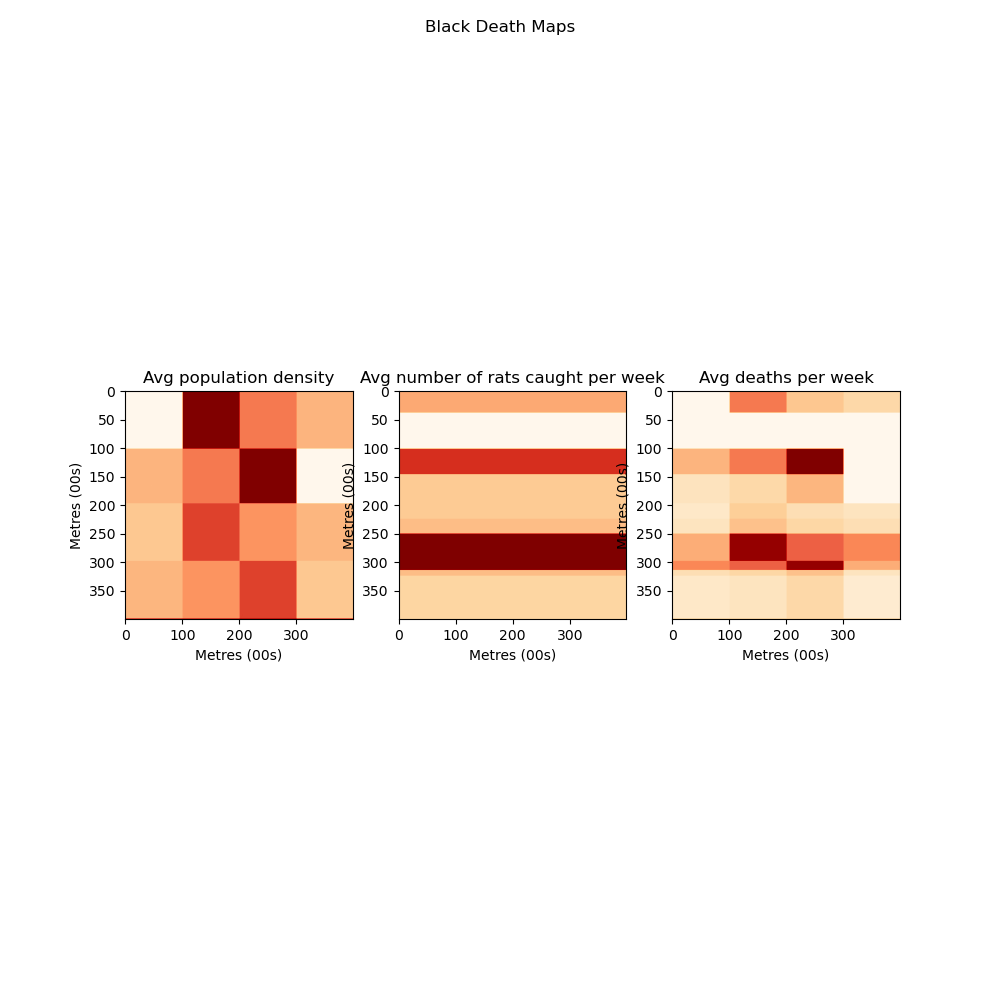

In [6]:
# set subplot figures
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,10))

# set title
plt.suptitle('Black Death Maps')

# the loop below calculates the formula: d = (0.8 x r) x (1.3 x p)

deaths_week.clear()

# loop through the nested (pop_sub and rat_sub) lists within the pop_den and rats lists. 
# each loop the temporary list is appended to the deaths_week (calculated average deaths per week) list
for pop_sub, rat_sub in zip(pop_den, rats):
    # create temporary list to hold calculated values (using the above formula)
    temp = []
    # loop through values in population density and rats caught nested lists and 
    for pop_val, rat_val in zip(pop_sub, rat_sub):
        # loop multiplies values by their weighting factor
        # loop multiplies weighted values
        # loop appends to temporary list
        temp.append((pop_val * p_wt) * (rat_val * r_wt))
    # loop appends temporary lists to weekly deaths list as nested lists
    deaths_week.append(temp)

plt.sca(ax[0]);
plt.ylabel("Metres (00s)")
plt.xlabel("Metres (00s)")
plt.imshow(pop_den, cmap='OrRd'); plt.title("Avg population density")
plt.sca(ax[1]);
plt.ylabel("Metres (00s)")
plt.xlabel("Metres (00s)")
plt.imshow(rats, cmap='OrRd'); plt.title("Avg number of rats caught per week")
plt.sca(ax[2]);
plt.ylabel("Metres (00s)")
plt.xlabel("Metres (00s)")
plt.imshow(deaths_week, cmap='OrRd'); plt.title("Avg deaths per week")
plt.show()

f = open("average_deaths.txt", 'w')
for line in deaths_week:
    f.write(str(line) + '\n')
f.close()

<IPython.core.display.Javascript object>


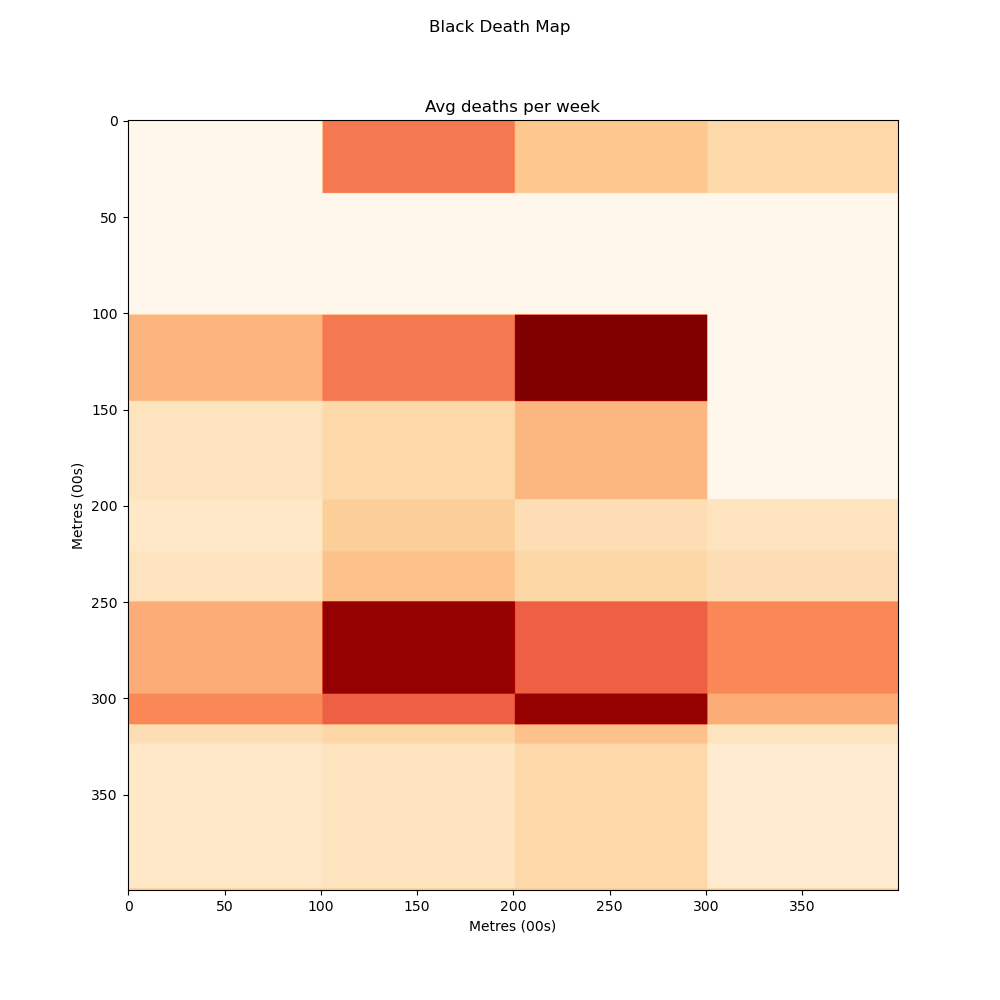

interactive(children=(FloatSlider(value=0.8, description='p_wt', max=2.4000000000000004, min=-0.8), FloatSlide…

In [14]:
# set figure
fig, ax = plt.subplots(1, figsize=(10,10))

# set title
plt.suptitle('Black Death Map')

# define function to update plot and write to text file each time slider is modified by user
def update_plot(p_wt, r_wt):
    """
    function takes weighting values from the sliders, 
    replots the average number of deaths per week map,
    writes data to text file
    """
    
    # clears previously written data before update
    deaths_week.clear()

    # the loop below calculates average deaths as per the the equation: d = (0.8 x r) x (1.3 x p)
    
    # loop through the nested (pop_sub and rat_sub) lists within the pop_den and rats lists. 
    # each loop the temporary list is appended to the deaths_week (calculated average deaths per week) list
    for pop_sub, rat_sub in zip(pop_den, rats):
        # create temporary list to hold calculated values (using the above formula)
        temp = []
        # loop through values in population density and rats caught nested lists and 
        for pop_val, rat_val in zip(pop_sub, rat_sub):
            # loop multiplies values by their weighting factor
            # loop multiplies weighted values
            # loop appends to temporary list
            temp.append((pop_val * p_wt) * (rat_val * r_wt))
        # loop appends temporary lists to weekly deaths list as nested lists
        deaths_week.append(temp)
    
    # set axes labels
    plt.ylabel("Metres (00s)")
    plt.xlabel("Metres (00s)")
    
    # pass through deaths data and plot
    plt.imshow(deaths_week, cmap='OrRd'); plt.title("Avg deaths per week")
    plt.show()
    
    # create and open new text document
    f = open("average_deaths_user_modified.txt", 'w')
    # loop through lines in deaths list
    for line in deaths_week:
        # write lines to text file
        f.write(str(line) + '\n')
    # close text file
    f.close()
    


# create slider for user to modify the weighting of population density in the equation
p_wt = widgets.FloatSlider(min=0.0, max=2.0, value=0.8, step=0.1, description='p weighting: ')

# create slider for user to modify the weighting of rats caught weekly in the average deaths equation
r_wt = widgets.FloatSlider(min=0.0, max=2.0, value=1.3, step=0.1, description='r weighting: ')

# link slider widgets to the update_plot function
# call function and pass arguments and define their corresponding widgets
# this links the value of the widgets to the arguments of the function
# each time the slider widget is modified by the user, the function is rerun with the new value of the widget
widgets.interactive(update_plot, p_wt=p_wt.value, r_wt=r_wt.value)
